In [118]:
#Adding the needed depedencies to the notebook
using QuacIO
using Makie
using GLMakie
using Tenet
using LinearAlgebra
using EinExprs
Makie.inline!(true)


true

rand(TensorNetwork, n::Integer, regularity::Integer; out = 0, dim = 2:9, seed = nothing, globalind = false)

Generate a random tensor network.

# Arguments

  - `n` Number of tensors.
  - `regularity` Average number of indices per tensor.
  - `out` Number of open indices.
  - `dim` Range of dimension sizes.
  - `seed` If not `nothing`, seed random generator with this value.
  - `globalind` Add a global 'broadcast' dimension to every tensor.


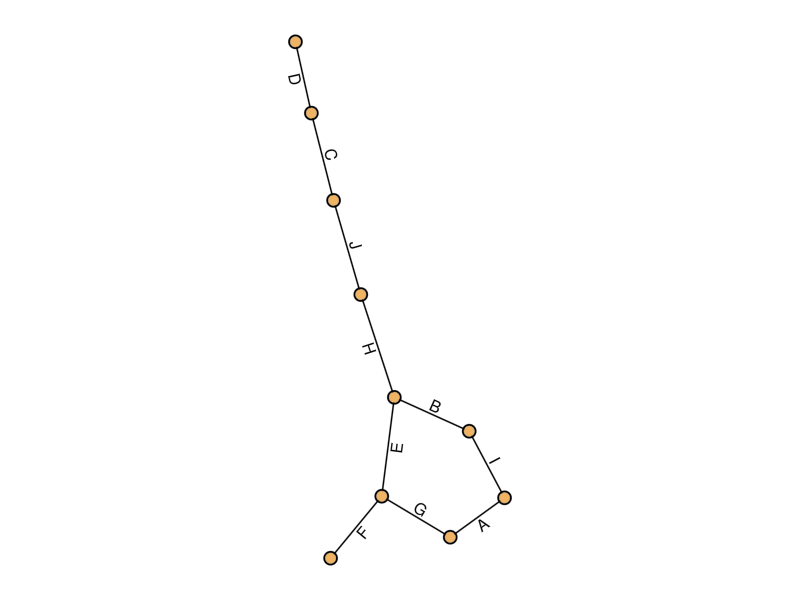

In [119]:
seed1 = 2

TN = rand(TensorNetwork, 10::Integer, 2::Integer; out = 0, dim = 1:4, seed = seed1, globalind = false)
plot(TN, labels=true)

In [120]:
indices = inds(TN, :inner)
index_size_map = size(TN)

println(indices)
println(typeof(indices[5]))

for index in indices
    println("Index $index has size $(index_size_map[index])")
end


[:F, :A, :D, :B, :I, :H, :G, :J, :E, :C]
Symbol
Index F has size 3
Index A has size 4
Index D has size 2
Index B has size 3
Index I has size 2
Index H has size 4
Index G has size 1
Index J has size 3
Index E has size 2
Index C has size 3


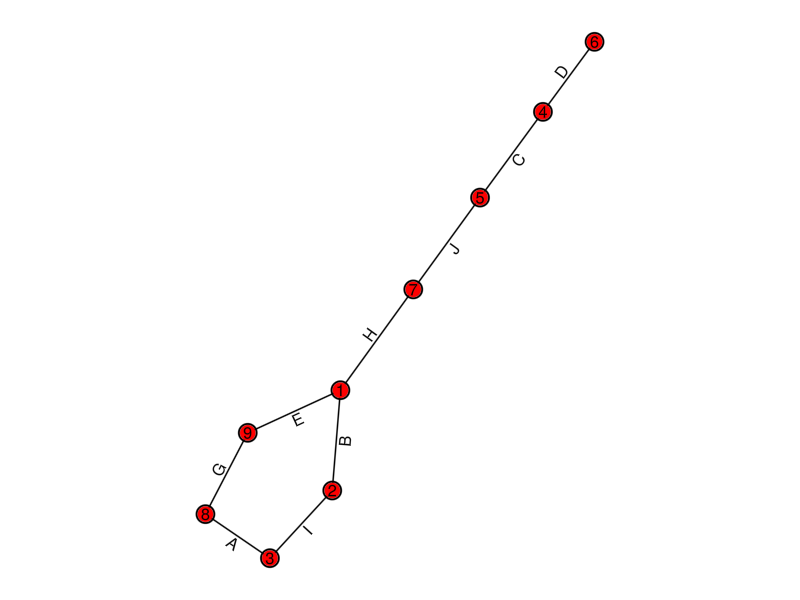

In [121]:
contract!(TN, (Symbol("F"),))
node_colors = ["red", "green", "blue", "yellow", "orange"]
plot(TN, labels=true, node_color="red", ilabels= ["$i" for i in 1:length(indices)-1])


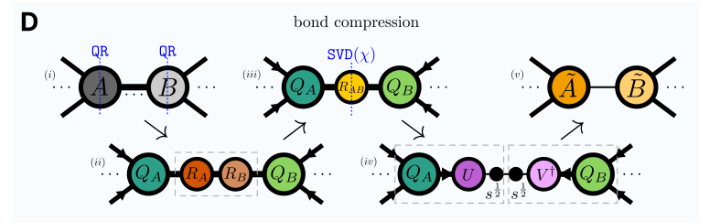

In [130]:
function contract_with_max_bond(
    tn,
    contraction_indices::Vector{Symbol},
    max_bond_dim::Int
)
    for i in 1:length(contraction_indices) - 1
        idx1 = contraction_indices[i]
        idx2 = contraction_indices[i + 1]

        # Contract tensors with specified indices
        new_tensor = contract(select(tn, idx1), select(tn, idx2))

        # Check if the bond dimension exceeds the maximum
        bond_dim = size(new_tensor, findfirst(x -> x == idx1, indices(new_tensor)))
        if bond_dim > max_bond_dim
            # Perform truncated SVD
            u, s, v = svd(new_tensor, max_bond_dim)
            
            # Replace the original tensors with the truncated SVD tensors
            tensor_left = contract(select(tn, idx1), u)
            tensor_right = contract(diagm(s), v')
            
            # Update the tensor network
            push!(tn, tensor_left, tensor_right)
            delete!(tn, select(tn, idx1))
            delete!(tn, select(tn, idx2))
        else
            # Update the tensor network with the contracted tensor
            push!(tn, new_tensor)
            delete!(tn, select(tn, idx1))
            delete!(tn, select(tn, idx2))
        end
    end

    return tn
end

contract_with_max_bond (generic function with 2 methods)

In [131]:
TN1 = copy(TN)

contract(TN)
contract_with_max_bond(TN1, indices, 4)

println(TN)
println(TN1)

UndefVarError: UndefVarError: `select` not defined